In [70]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import PIL
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
def show_img(arr_img):
    pil_image=PIL.Image.fromarray(arr_img)
    imshow(pil_image)

(28, 28)

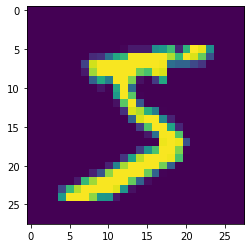

In [65]:
show_img(x_train[0])
x_train[0].shape

In [55]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1568)             

In [58]:
history = model.fit(
  x=x_train,
  y=y_train,
  validation_data=(x_test, y_test),
  epochs=5,
  shuffle=True,
)

Epoch 1/5


/home/gmallet/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 16s 8ms/step - loss: 0.1568 - accuracy: 0.9536 - val_loss: 0.0567 - val_accuracy: 0.9819
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0330 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0344 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0283 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0255 - val_accuracy: 0.9903


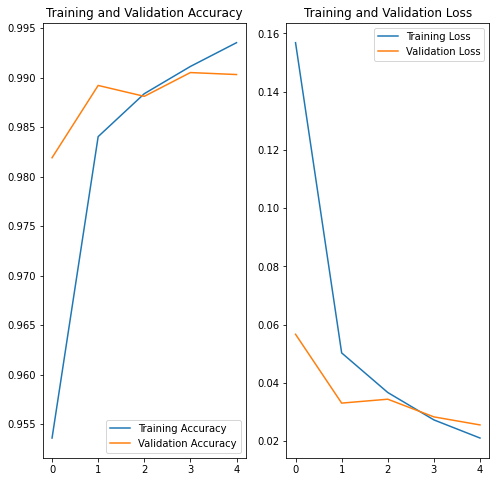

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# FROM HERE, WE CAN CONCLUDE THAT MODEL IS OVERFITTING AFTER ONLY 2 EPOCH

In [60]:
predictions = model.predict(x_test)

In [71]:
results = []
for prediction, label in zip(predictions, y_test):
    result = {
        "prediction": np.argmax(prediction),
        "value": label,
    }

    results.append(result)

In [73]:
import random
samples = random.sample(results, 10)
print(samples)

[{'prediction': 5, 'value': 5}, {'prediction': 4, 'value': 4}, {'prediction': 8, 'value': 8}, {'prediction': 3, 'value': 3}, {'prediction': 4, 'value': 4}, {'prediction': 4, 'value': 4}, {'prediction': 0, 'value': 0}, {'prediction': 2, 'value': 2}, {'prediction': 5, 'value': 5}, {'prediction': 6, 'value': 6}]


this number is most likely a 6


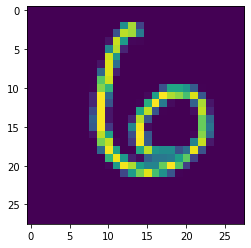

In [74]:
x_example = x_test[100]
p_example = predictions[100]
show_img(x_example)
print(f"this number is most likely a {np.argmax(p_example)}")